## Image OCR Analysis

In [4]:
!pip install easyocr opencv-python matplotlib pillow

In [5]:
import cv2
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

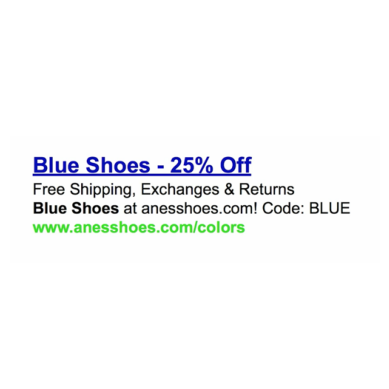

In [6]:
img = cv2.imread("images-dataset/p1/1/1.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")

## OCR

In [9]:
import easyocr

In [13]:
reader = easyocr.Reader(['en'], gpu=False)
results = reader.readtext(img)

for bbox, text, prob in results:
    print(f"{text}  | confidence: {prob:.2f}")


Using CPU. Note: This module is much faster with a GPU.


Blue_Shoes  | confidence: 0.50
25% Qff  | confidence: 0.89
Free Shipping, Exchanges & Returns  | confidence: 0.73
Blue Shoes at anesshoes coml Code: BLUE  | confidence: 0.68
WWW anesshoes comlcolors  | confidence: 0.68


(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

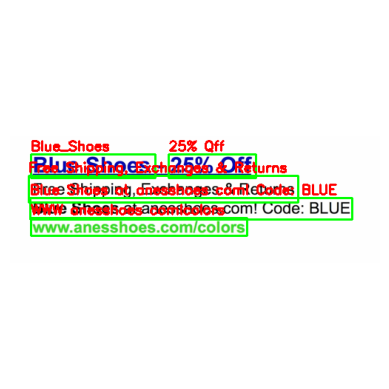

In [14]:
import numpy as np

img_box = img_rgb.copy()

for (bbox, text, prob) in results:
    pts = np.array(bbox, dtype=np.int32)
    cv2.polylines(img_box, [pts], True, (0,255,0), 2)
    cv2.putText(
        img_box, text,
        (pts[0][0], pts[0][1]-5),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6, (255,0,0), 2
    )

plt.imshow(img_box)
plt.axis("off")


In [15]:
# Full text
full_text = " ".join([text for _, text, _ in results])
print(full_text)

Blue_Shoes 25% Qff Free Shipping, Exchanges & Returns Blue Shoes at anesshoes coml Code: BLUE WWW anesshoes comlcolors
